In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load datasets
spotify = pd.read_csv("SpotifyTopSongsByCountry - May 2020.csv")
democracy = pd.read_csv("deliberative-democracy-index-vdem.csv")

# Compute proportion of explicit songs per country
spotify["Country"] = spotify["Country"].replace({"Czech Republic": "Czechia"})
spotify_explicit = (
    spotify.groupby(["Country", "Continent"])["Explicit"]
    .mean()
    .reset_index()
    .rename(columns={"Explicit": "Explicit_Proportion"})
)

# Filter democracy data for 2020
democracy_2020 = democracy[democracy["Year"] == 2020][
    ["Entity", "Deliberative democracy index (central estimate)"]
].rename(columns={
    "Entity": "Country",
    "Deliberative democracy index (central estimate)": "Democracy_Index"
})

# Merge both datasets
merged = pd.merge(spotify_explicit, democracy_2020, on="Country", how="inner")

In [3]:
# Define a color mapping for each continent
continent_colors = {
    "Africa": "#fffea3",
    "Asia": "#8de5a1",
    "Europe": "#b9f2f0",
    "North America": "#d0bbff",
    "South America": "#a1c9f4",
    "Australia": "#ff9f9b",
    "Global": "gray"
}

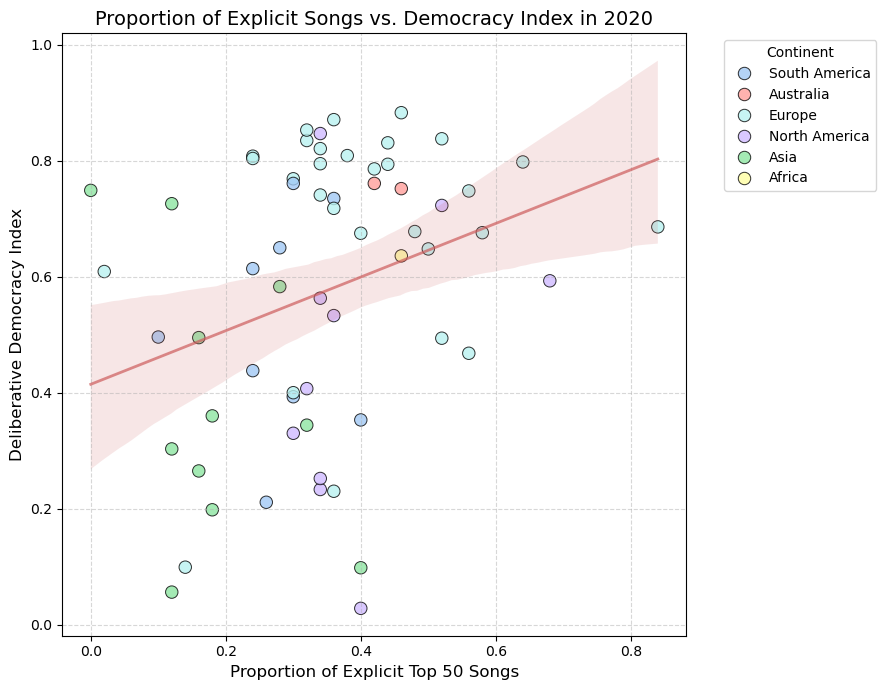

Correlation coefficient (r): 0.30170931505411286


In [4]:
# Scatterplot colored by continent
plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=merged,
    x="Explicit_Proportion",
    y="Democracy_Index",
    hue="Continent",
    palette= continent_colors,
    s=80,
    alpha=0.8,
    edgecolor="black"
)

# Add regression line (overall trend)
sns.regplot(
    data=merged,
    x="Explicit_Proportion",
    y="Democracy_Index",
    scatter=False,
    color="indianred",
    line_kws={"linewidth": 2, "alpha": 0.7}
)

# Format the plot
plt.title("Proportion of Explicit Songs vs. Democracy Index in 2020", fontsize=14)
plt.xlabel("Proportion of Explicit Top 50 Songs", fontsize=12)
plt.ylabel("Deliberative Democracy Index", fontsize=12)
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Display
plt.savefig("democracy index vs. prop of explicit regression2.png")
plt.show()

corr = merged["Explicit_Proportion"].corr(merged["Democracy_Index"])
print("Correlation coefficient (r):", corr)

In [5]:
# Make training/testing datasets
train = merged[['Democracy_Index']]
test = merged['Explicit_Proportion']

# Make predictive regression model
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predict explicit proportion for test data
predict = model.predict(X_test)
predict

array([0.35719976, 0.26818472, 0.35346687, 0.27435834, 0.33135668,
       0.32733665, 0.36322981, 0.3869193 , 0.3742849 , 0.34528323,
       0.37299275, 0.3165687 , 0.37629492])

In [7]:
# Check efficiency of model
model.score(X_test, y_test)

0.16700411918017433

In [8]:
# One-hot encode Continent (creates 0/1 columns for each continent)
continent_dummies = pd.get_dummies(merged["Continent"], drop_first=True)

# Combine Democracy_Index with encoded continents
X = pd.concat([merged[["Democracy_Index"]], continent_dummies], axis=1)
y = merged["Explicit_Proportion"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
mult_model = LinearRegression()
mult_model.fit(X_train, y_train)

# Predict
mult_predict = mult_model.predict(X_test)
mult_predict


array([0.40522454, 0.20639682, 0.2946903 , 0.42855216, 0.30091639,
       0.41363381, 0.40352652, 0.39685571, 0.40041348, 0.35583891,
       0.40077734, 0.3050806 , 0.39984747])

In [9]:
mult_model.score(X_test, y_test)

0.23154508456765854

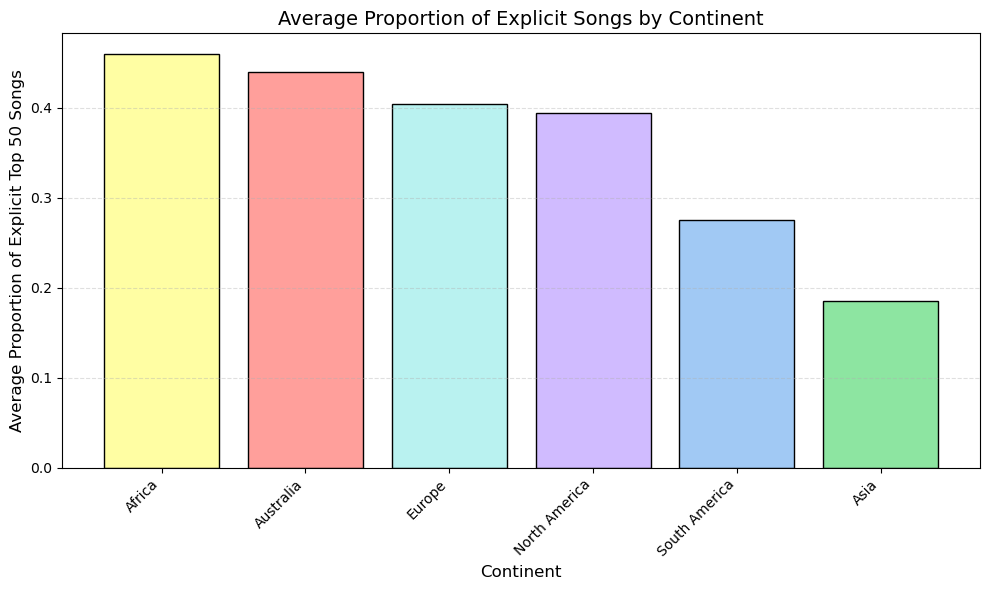

In [10]:
spotify = spotify[spotify["Continent"] != "Global"]

country_explicit = (
    spotify.groupby(["Country", "Continent"])["Explicit"]
    .mean()
    .reset_index()
    .rename(columns={"Explicit": "Explicit_Proportion"})
)

# Average explicit proportion per continent
continent_avg = (
    country_explicit.groupby("Continent")["Explicit_Proportion"]
    .mean()
    .reset_index()
)

# Sort descending
continent_avg = continent_avg.sort_values("Explicit_Proportion", ascending=False)

# Create bar colors based on your map
bar_colors = continent_avg["Continent"].map(lambda c: continent_colors.get(c, "#cccccc"))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(
    continent_avg["Continent"],
    continent_avg["Explicit_Proportion"],
    color=bar_colors,
    edgecolor="black"
)

plt.title("Average Proportion of Explicit Songs by Continent", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average Proportion of Explicit Top 50 Songs", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig("explicit prop by continent.png")
plt.show()

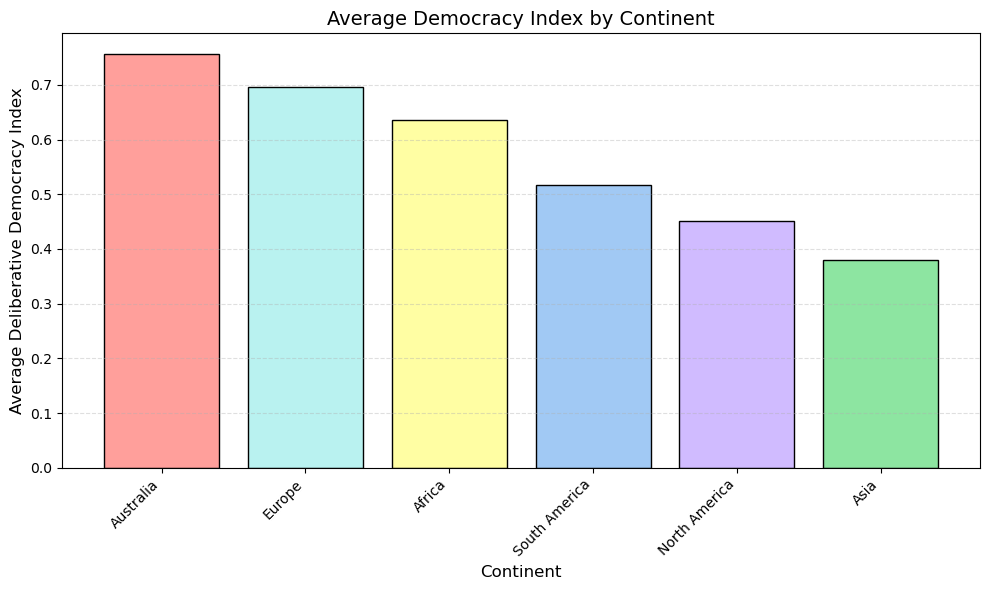

In [11]:
# Compute average democracy index per continent
continent_avg = (
    merged.groupby("Continent")["Democracy_Index"]
    .mean()
    .reset_index()
)

# Sort continents descending by democracy index
continent_avg = continent_avg.sort_values("Democracy_Index", ascending=False)

# Apply custom continent colors
bar_colors = continent_avg["Continent"].map(lambda c: continent_colors.get(c, "#cccccc"))

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    continent_avg["Continent"],
    continent_avg["Democracy_Index"],
    color=bar_colors,
    edgecolor="black"
)

plt.title("Average Democracy Index by Continent", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average Deliberative Democracy Index", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig("democracy index by continent.png")
plt.show()

In [12]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [13]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
